## Creating Priority Queue Class

In [230]:
class PriorityQueue(object): #borrowed from geeks for geeks then modified heavily
    def __init__(self):
        self.queue = []
 
    def __str__(self):
        return ' '.join([str(i) for i in self.queue])
    
    def printQueue(self):
        print(self.queue)
    
    def returnLen(self):
        return len(self.queue)
        
    # for checking if the queue is empty
    def isEmpty(self):
        return len(self.queue) == 0
    
    def doesDataExist(self, data):
        for li in self.queue:
            if li[1] == data:
                return True
        return False
    
    def updatePriority(self, priority, data):
        if self.doesDataExist(data) == False:
            return
        for i in range(len(self.queue)):
            if self.queue[i][1] == data:
                self.queue[i][0] = priority
                return
 
    # for inserting an element in the queue
    def insert(self, priority, data): 
        li = [priority, data]
        self.queue.append(li)
 
    # for popping an element based on Priority
    def delete(self):
        try:
            min_val = 0
            for i in range(len(self.queue)):
                if self.queue[i][0] < self.queue[min_val][0]:
                    min_val = i
            item = self.queue[min_val][1]
            del self.queue[min_val]
            return item
        except IndexError:
            print()
            exit()

## Creating Adj Mat Graph and Dijkstra's algorithm

In [231]:
import sys
import numpy as np
 
class AdjMatGraph(): #adj mat format
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)]
                      for row in range(vertices)]
        self.dist = None
        self.prev = None
        self.accessCnt = None
        
    def printSolution(self):
        print("Vertex \tPrevious \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", self.prev[node], "\t \t", self.dist[node])
        
    
    def printGraphInfo(self):
        print("Number of vertices: \t\t", self.V)
        print("Number of edges: \t\t", np.count_nonzero(self.graph))
        print("Number of matrix accesses: \t", self.accessCnt)
        
    def getVEA(self):
        
        return self.V, np.count_nonzero(self.graph), self.accessCnt
        
    def dijkstra(self, src):
        accessCnt = 0 # count the number of times the matrix is assessed
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        prev = [-1] * self.V
        visited = [False] * self.V
        pq = PriorityQueue()
        pq.insert(0, src)
        while not pq.isEmpty():
            u = pq.delete()
            visited[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and visited[v] == False:
                    if dist[v] > dist[u] + self.graph[u][v]:
                        dist[v] = dist[u] + self.graph[u][v]
                        prev[v] = u
                        accessCnt += 2
                    else:
                        accessCnt += 1
                        
                    if(pq.doesDataExist(v)):
                        pq.updatePriority(dist[v], v)
                    else:
                        pq.insert(dist[v], v)

                    accessCnt += 2
                else: 
                    accessCnt += 1
        
        self.dist = dist
        self.prev = prev
        self.accessCnt = accessCnt

## Testing algorithm

In [232]:
g = AdjMatGraph(9)
g.graph = [[0, 4, 0, 0, 0, 0, 0, 8, 0],
           [4, 0, 8, 0, 0, 0, 0, 11, 0],
           [0, 8, 0, 7, 0, 4, 0, 0, 2],
           [0, 0, 7, 0, 9, 14, 0, 0, 0],
           [0, 0, 0, 9, 0, 10, 0, 0, 0],
           [0, 0, 4, 14, 10, 0, 2, 0, 0],
           [0, 0, 0, 0, 0, 2, 0, 1, 6],
           [8, 11, 0, 0, 0, 0, 1, 0, 7],
           [0, 0, 2, 0, 0, 0, 6, 7, 0]
          ]
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 0 	 	 4
2 	 1 	 	 12
3 	 2 	 	 19
4 	 5 	 	 21
5 	 6 	 	 11
6 	 7 	 	 9
7 	 0 	 	 8
8 	 2 	 	 14
Number of vertices: 		 9
Number of edges: 		 28
Number of matrix accesses: 	 119


## Creating and testing a random Adj Mat Graph Gen

In [233]:
import random as rd

def randomAdjMatGraphGen(vertices, edges, dist): 
    #note that edges mean max random no.of edges exiting a source vertex
    #note that dist mean max dist from source vertex to destination vertex
    if vertices < 1 or edges < 1 or dist < 1:
        print("randomAdjMatGraphGen() has encountered an error!")
        
    arr = []
    for i in range(vertices):
        li = [0] * vertices
        for j in range(rd.randint(1, edges)):
            r = rd.randint(0, vertices - 1)
            while r == i:
                r = rd.randint(0, vertices - 1)
            li[r] = rd.randint(1, dist)
        arr.append(li)
    return arr

In [234]:
g = AdjMatGraph(10)
g.graph = randomAdjMatGraphGen(10, 3, 10)
print(g.graph)
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

[[0, 5, 0, 0, 0, 0, 0, 0, 0, 0], [10, 0, 0, 0, 10, 0, 8, 0, 0, 0], [0, 0, 0, 0, 0, 0, 10, 0, 0, 9], [0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [0, 0, 0, 10, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 7, 0, 0, 0, 0, 0], [9, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 0, 0, 9, 0, 0, 0], [1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 10, 0, 0, 0, 0, 0, 0]]
Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 0 	 	 5
2 	 -1 	 	 9223372036854775807
3 	 4 	 	 25
4 	 1 	 	 15
5 	 -1 	 	 9223372036854775807
6 	 1 	 	 13
7 	 -1 	 	 9223372036854775807
8 	 -1 	 	 9223372036854775807
9 	 -1 	 	 9223372036854775807
Number of vertices: 		 10
Number of edges: 		 14
Number of matrix accesses: 	 62


## Creating an Adj List Graph

In [235]:
import heapq

class AdjListGraph(): #adj list format
    def __init__(self, vertices):
        self.V = vertices
        self.graph = None
#       graph = {0: [[dist, node], [dist, node], [dist, node],...],
#                1: [[dist, node], [dist, node], [dist, node],...],
#                2: [[dist, node], [dist, node], [dist, node],...],
#                ...
#               }
        self.dist = None
        self.prev = None
        self.accessCnt = None
        self.edges = None

    def printSolution(self):
        print("Vertex \tPrevious \tDistance from Source")
        for node in range(self.V):
            print(node, "\t", self.prev[node], "\t \t", self.dist[node])
    
    def printGraphInfo(self):
        print("Number of vertices: \t\t", self.V)
        cnt = 0
        for i in self.graph:
            cnt += len(self.graph[i])
        print("Number of edges: \t\t", cnt)
        print("Number of matrix accesses: \t", self.accessCnt)
        
    def getVEA(self):
        return self.V, self.edges, self.accessCnt
        
    def dijkstra(self, src):
        accessCnt = 0 # count the number of times the adj list is assessed
        dist = [sys.maxsize] * self.V
        dist[src] = 0
        prev = [-1] * self.V
        visited = [False] * self.V
        pq = [] #it should contain [dist, node], heapify based on dist
        pq.append([src, 0])
        while pq:
            u = pq.pop(0)[1]
            visited[u] = True
            for v in self.graph[u]: # v = [dist, node]-> [dist, node]->... v represents adj nodes and their distances originating from node u
                if visited[v[1]] == False:
                    if dist[v[1]] > dist[u] + v[0]:
                        dist[v[1]] = dist[u] + v[0]
                        prev[v[1]] = u
                        accessCnt += 5
                    
                    else:
                        accessCnt += 2
                        
                    dne = True
                    for i in range(len(pq)):
                        if pq[i][1] == v[1]:
                            dne = False
                            pq[i][0] = dist[v[1]]
                            heapq.heapify(pq)
                            accessCnt += 2
                        
                        else:
                            accessCnt += 1
                            
                    if dne == True:
                        pq.append([dist[v[1]] , v[1]]) # if node doesn't exist in pq, append, else update in pq
                        heapq.heapify(pq)
                        accessCnt += 2
        
        cnt = 0
        for i in self.graph:
            cnt += len(self.graph[i])
        self.edges = cnt
        self.dist = dist
        self.prev = prev
        self.accessCnt = accessCnt

In [236]:
g = AdjListGraph(9)
g.graph = {0: [[4, 1], [8, 7]],
           1: [[4, 0], [8, 2], [11, 7]],
           2: [[8, 1], [7, 3], [4, 5], [2, 8]],
           3: [[7, 2], [9, 4], [14, 5]],
           4: [[9, 3], [10, 5]],
           5: [[4, 2], [14, 3], [10, 4], [2, 6]],
           6: [[2, 5], [1, 7], [6, 8]],
           7: [[8, 0], [11, 1], [1, 6], [7, 8]],
           8: [[2, 2], [6, 6], [7, 7]]
          }
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 0 	 	 4
2 	 1 	 	 12
3 	 2 	 	 19
4 	 5 	 	 21
5 	 6 	 	 11
6 	 7 	 	 9
7 	 0 	 	 8
8 	 2 	 	 14
Number of vertices: 		 9
Number of edges: 		 28
Number of matrix accesses: 	 106


## Creating and testing another random graph gen for Adj List

In [237]:
def randomAdjListGraphGen(vertices, edges, dist):
    #note that edges mean max random no.of edges exiting a source vertex
    #note that dist mean max dist from source vertex to destination vertex
    if vertices < 1 or edges < 1 or dist < 1:
        print("randomAdjListGraphGen() has encountered an error!")
    
#     arr = dict(zip(key, list of adj nodes and dist))
    key = [i for i in range(vertices)]
    twoDArr = []
#     [[],
#      [],
#      [],
#      ...
#     ]
    for i in range(vertices):
        oneDArr = []
        for j in range(rd.randint(1, edges)):
            li = [rd.randint(1, dist)]
            k = rd.randint(0, vertices - 1)
            while k == i: 
                k = rd.randint(0, vertices - 1)
            li.append(k)
            oneDArr.append(li)
        twoDArr.append(oneDArr)
    return dict(zip(key, twoDArr))
    

In [238]:
g = AdjListGraph(10)
g.graph = randomAdjListGraphGen(10, 3, 10)
print(g.graph)
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

{0: [[5, 4]], 1: [[2, 2], [4, 2]], 2: [[10, 7], [10, 7], [1, 3]], 3: [[10, 5], [5, 0]], 4: [[6, 0], [9, 9]], 5: [[8, 1]], 6: [[7, 5]], 7: [[10, 8], [7, 2], [7, 4]], 8: [[7, 5]], 9: [[2, 2], [5, 8], [2, 2]]}
Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 5 	 	 34
2 	 9 	 	 16
3 	 2 	 	 17
4 	 0 	 	 5
5 	 8 	 	 26
6 	 -1 	 	 9223372036854775807
7 	 2 	 	 26
8 	 9 	 	 19
9 	 4 	 	 14
Number of vertices: 		 10
Number of edges: 		 19
Number of matrix accesses: 	 81


## Everything necessary has been created. Review below

In [239]:
g = AdjMatGraph(10) # 10 vertices
g.graph = randomAdjMatGraphGen(10, 3, 5) #10 vertices, 3 edges max extending from node, dist is 5 units long
print(g.graph)
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

print()
print()

g = AdjListGraph(10)
g.graph = randomAdjListGraphGen(10, 3, 5)
print(g.graph)
g.dijkstra(0)
g.printSolution()
g.printGraphInfo()

[[0, 0, 0, 0, 0, 0, 5, 0, 0, 0], [3, 0, 1, 0, 0, 0, 0, 0, 0, 0], [3, 0, 0, 0, 0, 4, 0, 4, 0, 0], [2, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 1, 0, 0], [0, 0, 0, 0, 5, 0, 0, 0, 0, 3], [0, 0, 0, 2, 0, 0, 0, 0, 4, 0], [0, 1, 0, 0, 5, 0, 0, 0, 0, 3], [0, 0, 1, 0, 0, 5, 0, 0, 0, 0], [0, 0, 0, 4, 0, 0, 0, 1, 0, 0]]
Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 7 	 	 15
2 	 8 	 	 10
3 	 6 	 	 7
4 	 5 	 	 19
5 	 8 	 	 14
6 	 0 	 	 5
7 	 2 	 	 14
8 	 6 	 	 9
9 	 5 	 	 17
Number of vertices: 		 10
Number of edges: 		 20
Number of matrix accesses: 	 133


{0: [[4, 1], [2, 5], [4, 3]], 1: [[1, 6]], 2: [[3, 7], [2, 3]], 3: [[4, 9], [5, 4]], 4: [[2, 9]], 5: [[4, 2]], 6: [[1, 5], [1, 0]], 7: [[3, 3]], 8: [[2, 2], [4, 2]], 9: [[1, 3]]}
Vertex 	Previous 	Distance from Source
0 	 -1 	 	 0
1 	 0 	 	 4
2 	 5 	 	 6
3 	 0 	 	 4
4 	 3 	 	 9
5 	 0 	 	 2
6 	 1 	 	 5
7 	 2 	 	 9
8 	 -1 	 	 9223372036854775807
9 	 3 	 	 8
Number of vertices: 		 10
Number of edges: 		 16
Number of matrix acces

## Time to test. First, for graphs with "too many" edges

In [225]:
# first is to test a graph with "too many" edges. set vertices to n, edges to n/2 
# second is to test a graph with "too few" edges. set vertices to n, edges to 3

#then draw graph plotting accesses to vertices and accesses to edges

adjMatAccessesList = []
adjMatVerticesList = []
adjMatEdgesList = []

for i in range(2,71):
    for j in range(5):
        g = AdjMatGraph(i)
        g.graph = randomAdjMatGraphGen(i, i//2, 10)
        g.dijkstra(0)
        v, e, a = g.getVEA()
        adjMatAccessesList.append(a)
        adjMatVerticesList.append(v)
        adjMatEdgesList.append(e)
    
print(adjMatAccessesList)
print(adjMatVerticesList)
print(adjMatEdgesList)
print()
print()

adjListAccessesList = []
adjListVerticesList = []
adjListEdgesList = []

for i in range(2,71):
    for j in range(5):
        g = AdjListGraph(i)
        g.graph = randomAdjListGraphGen(i, i//2, 10)
        g.dijkstra(0)
        v, e, a = g.getVEA()
        adjListAccessesList.append(a)
        adjListVerticesList.append(v)
        adjListEdgesList.append(e)
    
print(adjListAccessesList)
print(adjListVerticesList)
print(adjListEdgesList)

[7, 7, 7, 7, 7, 9, 15, 15, 9, 15, 11, 25, 25, 11, 11, 29, 40, 21, 21, 29, 51, 46, 53, 35, 46, 69, 67, 61, 72, 57, 96, 82, 96, 96, 99, 97, 97, 109, 111, 98, 123, 120, 108, 88, 137, 145, 143, 153, 163, 130, 191, 198, 178, 183, 200, 224, 170, 226, 224, 227, 261, 253, 246, 257, 275, 317, 261, 297, 306, 294, 339, 330, 347, 328, 350, 385, 357, 361, 374, 403, 407, 391, 433, 410, 423, 482, 478, 466, 470, 459, 534, 516, 541, 522, 491, 567, 564, 584, 574, 577, 635, 634, 626, 623, 621, 642, 674, 671, 695, 687, 713, 760, 724, 710, 721, 814, 789, 778, 775, 777, 860, 853, 909, 880, 868, 879, 898, 906, 952, 889, 985, 1009, 964, 1003, 1054, 1105, 1038, 1119, 1067, 1016, 1129, 1107, 1183, 1147, 1104, 1193, 1227, 1251, 1230, 1229, 1347, 1362, 1303, 1285, 1335, 1363, 1421, 1376, 1398, 1345, 1432, 1472, 1427, 1466, 1462, 1462, 1576, 1561, 1537, 1559, 1608, 1672, 1654, 1704, 1635, 1664, 1717, 1675, 1709, 1775, 1809, 1794, 1790, 1788, 1812, 1970, 1913, 1854, 1928, 1916, 2048, 2029, 2007, 1996, 1977, 2064, 2

Correlation: 0.9713086292700702


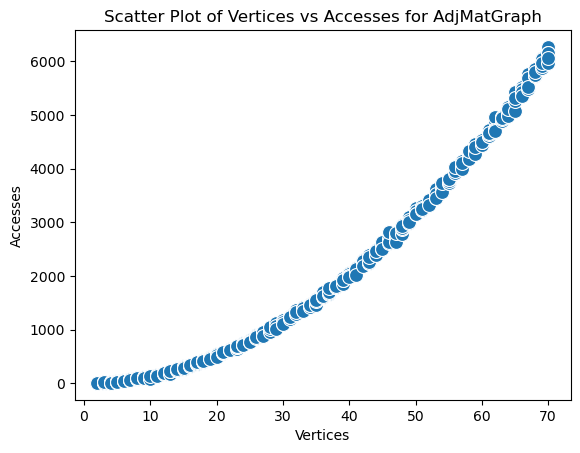

Correlation: 0.9962469097272642


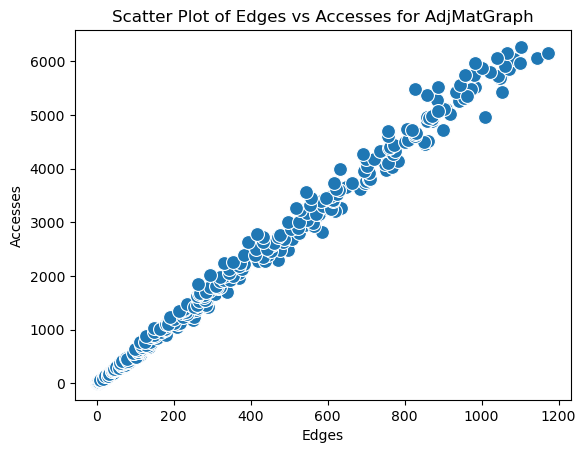

In [226]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

pd_key_comp = pd.DataFrame({'vertices': adjMatVerticesList, 'accesses': adjMatAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='vertices', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Vertices vs Accesses for AdjMatGraph')
plt.xlabel('Vertices')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['vertices'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

plt.show()

pd_key_comp = pd.DataFrame({'edges': adjMatEdgesList, 'accesses': adjMatAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='edges', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Edges vs Accesses for AdjMatGraph')
plt.xlabel('Edges')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['edges'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

Correlation: 0.9072889572926833


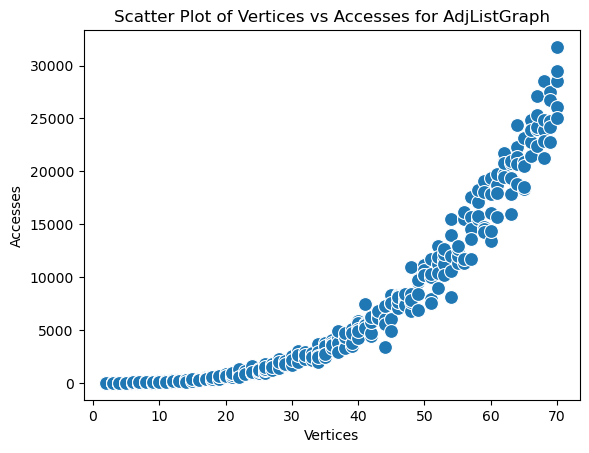

Correlation: 0.9805328334860482


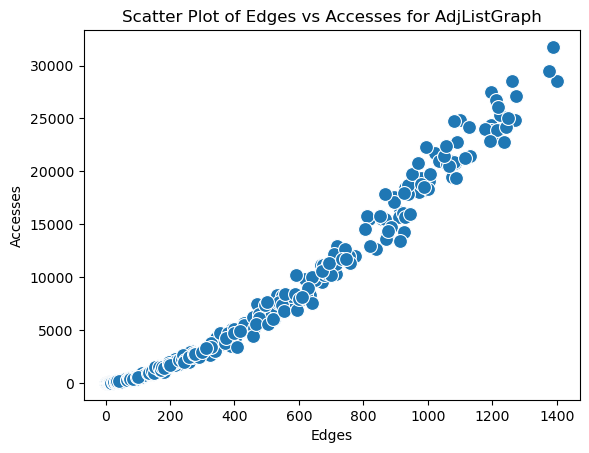

In [227]:
#printing for adjListGraph

pd_key_comp = pd.DataFrame({'vertices': adjListVerticesList, 'accesses': adjListAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='vertices', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Vertices vs Accesses for AdjListGraph')
plt.xlabel('Vertices')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['vertices'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

plt.show()

pd_key_comp = pd.DataFrame({'edges': adjListEdgesList, 'accesses': adjListAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='edges', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Edges vs Accesses for AdjListGraph')
plt.xlabel('Edges')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['edges'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

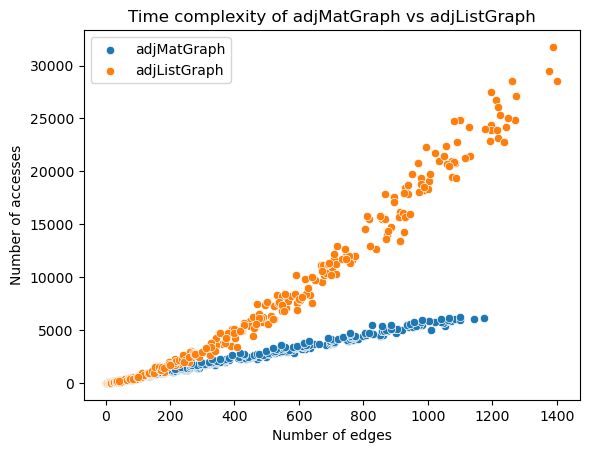

In [228]:
# Create DataFrames for listA and listB
dataA = {'A1': adjMatEdgesList, 'A2': adjMatAccessesList}
dataB = {'B1': adjListEdgesList, 'B2': adjListAccessesList}
dfA = pd.DataFrame(dataA)
dfB = pd.DataFrame(dataB)

# Create scatterplots for each DataFrame
sns.scatterplot(data=dfA, x='A1', y='A2', label='adjMatGraph')
sns.scatterplot(data=dfB, x='B1', y='B2', label='adjListGraph')

# Add labels, legend, and title
plt.xlabel('Number of edges')
plt.ylabel('Number of accesses')
plt.legend()
plt.title('Time complexity of adjMatGraph vs adjListGraph')

plt.show()

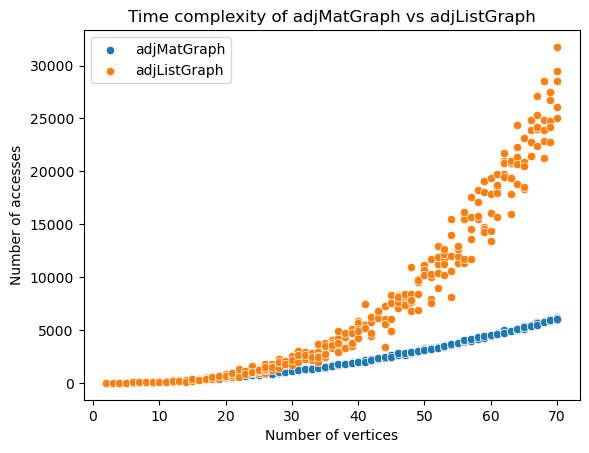

In [229]:
# Create DataFrames for listA and listB
dataA = {'A1': adjMatVerticesList, 'A2': adjMatAccessesList}
dataB = {'B1': adjListVerticesList, 'B2': adjListAccessesList}
dfA = pd.DataFrame(dataA)
dfB = pd.DataFrame(dataB)

# Create scatterplots for each DataFrame
sns.scatterplot(data=dfA, x='A1', y='A2', label='adjMatGraph')
sns.scatterplot(data=dfB, x='B1', y='B2', label='adjListGraph')

# Add labels, legend, and title
plt.xlabel('Number of vertices')
plt.ylabel('Number of accesses')
plt.legend()
plt.title('Time complexity of adjMatGraph vs adjListGraph')

plt.show()

## Time to test for graphs with "too little" edges

In [240]:
adjMatAccessesList = []
adjMatVerticesList = []
adjMatEdgesList = []

for i in range(2,71):
    for j in range(5):
        g = AdjMatGraph(i)
        g.graph = randomAdjMatGraphGen(i, 3, 10)
        g.dijkstra(0)
        v, e, a = g.getVEA()
        adjMatAccessesList.append(a)
        adjMatVerticesList.append(v)
        adjMatEdgesList.append(e)
    
print(adjMatAccessesList)
print(adjMatVerticesList)
print(adjMatEdgesList)
print()
print()

adjListAccessesList = []
adjListVerticesList = []
adjListEdgesList = []

for i in range(2,71):
    for j in range(5):
        g = AdjListGraph(i)
        g.graph = randomAdjListGraphGen(i, 3, 10)
        g.dijkstra(0)
        v, e, a = g.getVEA()
        adjListAccessesList.append(a)
        adjListVerticesList.append(v)
        adjListEdgesList.append(e)
    
print(adjListAccessesList)
print(adjListVerticesList)
print(adjListEdgesList)

[7, 7, 7, 7, 7, 15, 9, 15, 9, 17, 27, 28, 27, 25, 27, 37, 37, 39, 39, 37, 42, 15, 56, 33, 54, 61, 71, 17, 59, 57, 46, 87, 87, 76, 92, 83, 99, 57, 93, 107, 23, 122, 121, 106, 49, 123, 142, 158, 67, 121, 136, 171, 121, 177, 159, 196, 195, 205, 77, 129, 232, 138, 180, 195, 48, 126, 51, 242, 238, 241, 230, 170, 268, 288, 236, 319, 287, 264, 324, 264, 293, 275, 316, 343, 325, 327, 390, 357, 403, 355, 452, 43, 331, 375, 403, 439, 463, 457, 381, 411, 481, 422, 406, 478, 399, 315, 49, 527, 478, 468, 413, 600, 661, 571, 550, 482, 540, 400, 423, 536, 436, 681, 550, 676, 587, 697, 643, 638, 633, 603, 750, 757, 781, 536, 792, 740, 808, 673, 863, 713, 695, 867, 826, 899, 694, 865, 758, 857, 889, 903, 889, 917, 888, 1070, 995, 1093, 1093, 951, 583, 1137, 1083, 1048, 1078, 942, 1036, 1088, 967, 1111, 880, 915, 1296, 1181, 1223, 1064, 1093, 1285, 1377, 1173, 1414, 999, 1505, 1281, 1236, 1122, 1281, 1397, 1448, 123, 1150, 1397, 1649, 1384, 1255, 1389, 1567, 1185, 1656, 1424, 1647, 1020, 1596, 1444, 158

Correlation: 0.9460277040591684


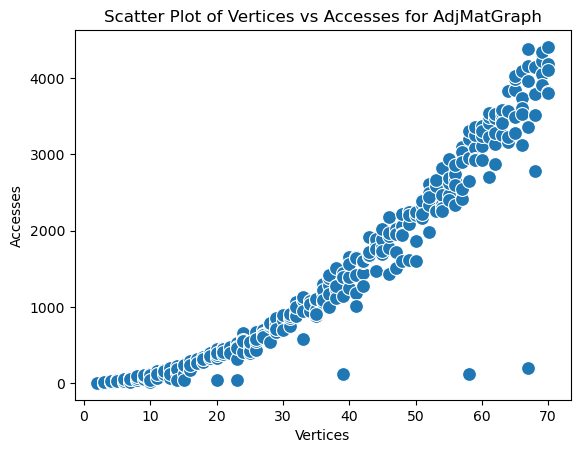

Correlation: 0.947359456635676


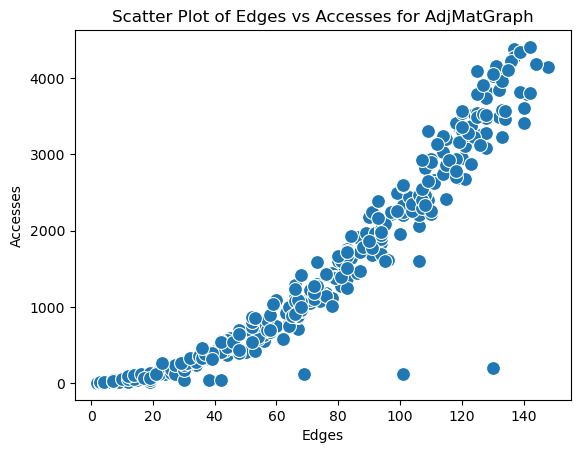

In [241]:
pd_key_comp = pd.DataFrame({'vertices': adjMatVerticesList, 'accesses': adjMatAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='vertices', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Vertices vs Accesses for AdjMatGraph')
plt.xlabel('Vertices')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['vertices'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

plt.show()

pd_key_comp = pd.DataFrame({'edges': adjMatEdgesList, 'accesses': adjMatAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='edges', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Edges vs Accesses for AdjMatGraph')
plt.xlabel('Edges')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['edges'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

Correlation: 0.9261950540792423


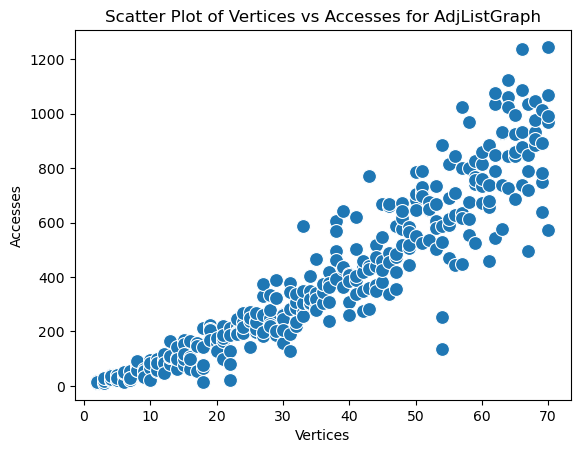

Correlation: 0.9404860889350515


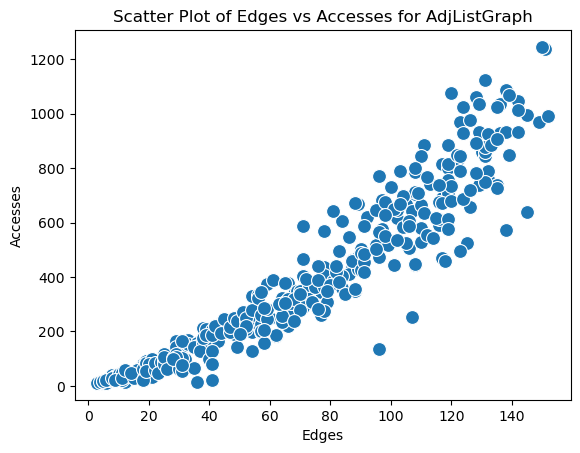

In [242]:
pd_key_comp = pd.DataFrame({'vertices': adjListVerticesList, 'accesses': adjListAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='vertices', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Vertices vs Accesses for AdjListGraph')
plt.xlabel('Vertices')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['vertices'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

plt.show()

pd_key_comp = pd.DataFrame({'edges': adjListEdgesList, 'accesses': adjListAccessesList})

# Create a scatter plot using seaborn
sns.scatterplot(data=pd_key_comp, x='edges', y='accesses', s=100)  # s is used to adjust the size of markers
plt.title('Scatter Plot of Edges vs Accesses for AdjListGraph')
plt.xlabel('Edges')
plt.ylabel('Accesses')

# Calculate and print the correlation
correlation = pd_key_comp['edges'].corr(pd_key_comp['accesses'])
print(f'Correlation: {correlation}')

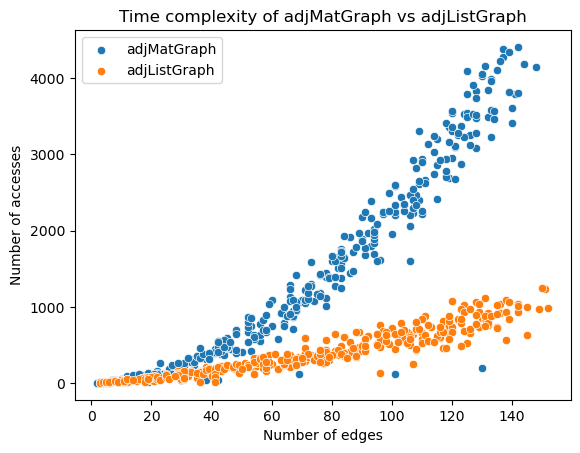

In [243]:
# Create DataFrames for listA and listB
dataA = {'A1': adjMatEdgesList, 'A2': adjMatAccessesList}
dataB = {'B1': adjListEdgesList, 'B2': adjListAccessesList}
dfA = pd.DataFrame(dataA)
dfB = pd.DataFrame(dataB)

# Create scatterplots for each DataFrame
sns.scatterplot(data=dfA, x='A1', y='A2', label='adjMatGraph')
sns.scatterplot(data=dfB, x='B1', y='B2', label='adjListGraph')

# Add labels, legend, and title
plt.xlabel('Number of edges')
plt.ylabel('Number of accesses')
plt.legend()
plt.title('Time complexity of adjMatGraph vs adjListGraph')

plt.show()

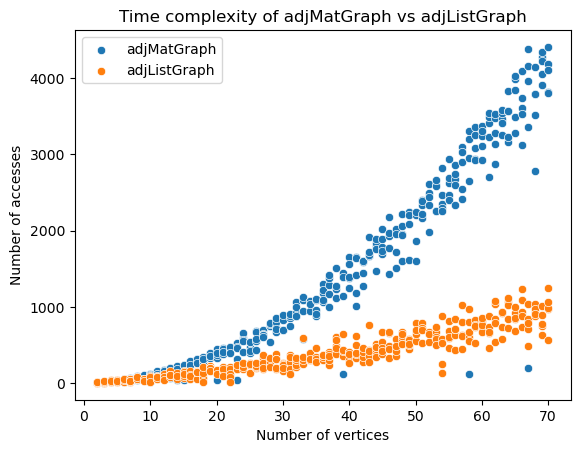

In [244]:
# Create DataFrames for listA and listB
dataA = {'A1': adjMatVerticesList, 'A2': adjMatAccessesList}
dataB = {'B1': adjListVerticesList, 'B2': adjListAccessesList}
dfA = pd.DataFrame(dataA)
dfB = pd.DataFrame(dataB)

# Create scatterplots for each DataFrame
sns.scatterplot(data=dfA, x='A1', y='A2', label='adjMatGraph')
sns.scatterplot(data=dfB, x='B1', y='B2', label='adjListGraph')

# Add labels, legend, and title
plt.xlabel('Number of vertices')
plt.ylabel('Number of accesses')
plt.legend()
plt.title('Time complexity of adjMatGraph vs adjListGraph')

plt.show()